<a href="https://www.kaggle.com/code/hicham1984/decision-tree-model-xgbclassifier-svc-lr?scriptVersionId=91279172" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>


<div class="alert alert-success">
    <h1 align="center">This notebook treated a classifikation Problem, I us a three different Model XGBClassifier, SVC and LR </h1>
</div>


<h1> <center><font size="6">Titanic EDA and Classifikation</font></center></h1>


​
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/1200px-RMS_Titanic_3.jpg" width="500"></img>

​
<br>
​
# <a id='0'>Content</a>
​
- <a href='#1'>Import Packages</a>  
- <a href='#2'>Introduction</a>    
- <a href='#3'>Import data </a>    
- <a href='#4'>Data exploration</a>   
 - <a href='#41'>Check the data</a>  
 - <a href='#42'>Merge Data</a>
  - <a href='#43'>Missing Values </a>   
 - <a href='#44'>Density plots of features</a>    
 - <a href='#45'>Distribution of min and max</a>   
  - <a href='#46'>Distribution of skew and kurtosis</a>   
 - <a href='#47'>Features correlations</a>      
- <a href='#5'>Feature engineering</a>
- <a href='#6'>Model</a>
 - <a href='#61'>Support Vector Model</a>
 - <a href='#62'>Logistic Regression Model</a>
 - <a href='#63'>Random Forest Classifier Model</a>
 - <a href='#64'>XGBoost Model</a>
- <a href='#7'>Submission</a>  
 

## Import Package

In [1]:

! pip install mglearn 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import mglearn 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
import csv
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score


     |████████████████████████████████| 540 kB 3.2 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=0b69a86f4f08d35a82e2eed0446f4a54c728787ab1bf68f59f2df04f535a454a
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


# 1 Introduction
The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck. the Data contains 11 Columns, 5 Categorys and 6 has nummeric Values

## Import Data

In [2]:
data=pd.read_csv('../input/titanic/train.csv')
test=pd.read_csv('../input/titanic/test.csv')
test_1=pd.read_csv('../input/titanic/test.csv')

output=pd.read_csv('../input/titanic/gender_submission.csv')
y_test= pd.DataFrame(output['Survived'])
data.shape,output.shape,y_test.shape,type(y_test)

((891, 12), (418, 2), (418, 1), pandas.core.frame.DataFrame)

# 2 Data exploration
## 2.1 Check the data
Let's check the train and test set.

In [3]:
print("Shape of Train-set", data.shape)
print("Shape of Test-set", test.shape)

Shape of Train-set (891, 12)
Shape of Test-set (418, 11)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
clo_cat = ['Name','Sex','Ticket','Cabin','Embarked']
col_num = [ 'Survived', 'Pclass', 'Age', 'SibSp','Parch', 'Fare']

## 2.2 merge Data
    - To improve the Model i have merged the Data
   
    - Drop irrelevant Column like PassengerId



In [7]:
test_1.insert(1, "Survived", output['Survived'], True)
frames=[data,test_1]
data = pd.concat(frames)
data = data.drop('PassengerId',axis = 1)
#Do the same thing by test
test = test.drop('PassengerId',axis = 1)
data.shape

(1309, 11)

##  2.3 Missing Values
    - we have Miss values by Age, Cabin and Embarked


In [8]:
data.isnull().sum()

Survived       0
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

## 2.4 Density plots of features
    - Show the distrubiton of Age, Fare to Sex


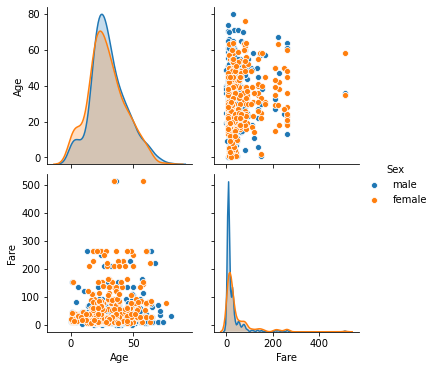

In [9]:

df = data[['Age','Fare','Sex']]

sns.pairplot(df, hue="Sex")

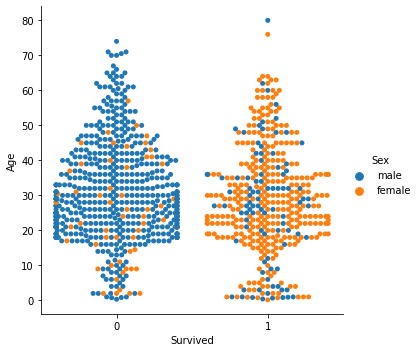

In [10]:
sns.catplot(data=data, kind="swarm", x="Survived", y="Age", hue="Sex")

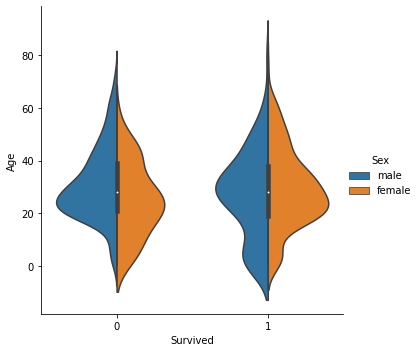

In [11]:
sns.catplot(data=data, kind="violin", x="Survived", y="Age", hue="Sex", split=True)

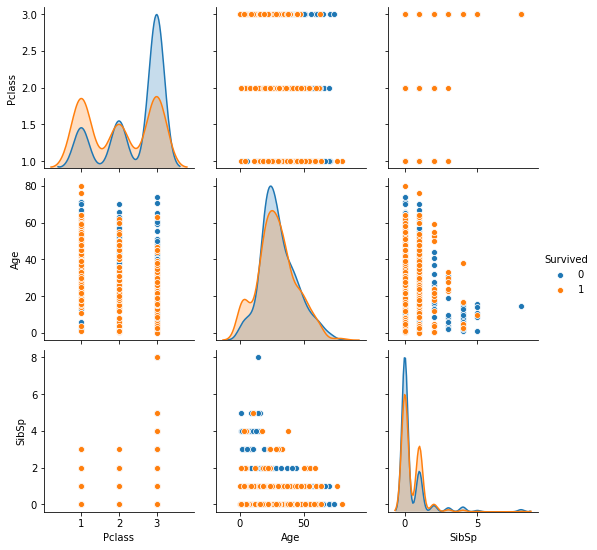

In [12]:
sns.pairplot(data[['Survived', 'Pclass', 'Age', 'SibSp']], hue="Survived")


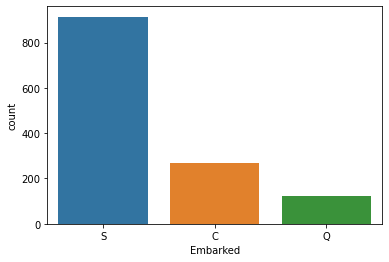

In [13]:
sns.countplot(data.Embarked)

## 2.5 Features correlations
    - There is no strong Correlation between the Featres

In [14]:
data.drop('Survived',axis =1).corr()


,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,-0.558629,0.178740,0.160238,0.221539,1.000000


## 

# 3 Feature engineering
    -The Ticket and Cabin are hight correlated, so that we cann remove the Cabin Columns
    -The Name Column contains same usefull Infomation for the Model
        - Extract the titel_Name **
    -Transforme the Categorys Column to nummeric Values

In [15]:
data.loc[data['Cabin'].isin(['G6','C23 C25 C27','B96 B98'])]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
27,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
205,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S
251,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S
341,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
390,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0000,B96 B98,S
394,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S
435,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0000,B96 B98,S
438,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


In [16]:
#data=pd.read_csv('../input/titanic/train.csv')
#test=pd.read_csv('../input/titanic/test.csv')
data['Name']= data['Name'].str.rsplit(',').str[-1]
test['Name']= test['Name'].str.rsplit(',').str[-1]
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,0,3,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
#data['Titel']= data['Titel'].replace('Mrs. Martin (Elizabeth L ','Mrs',inplace=True)

test[['Titel', 'Name']] = test['Name'].str.split('.', expand=True)
data[['Titel', 'Name','x']] = data['Name'].str.split('.', expand=True)
test = test.drop(['Name'], axis = 1)
data= data.drop(['Name'], axis = 1)


In [18]:

test['Ticket'] = pd.factorize(test.Ticket)[0]
test['Titel'] = pd.factorize(test.Titel)[0]
test['Sex'] = pd.factorize(test.Sex)[0]
test['Embarked'] = pd.factorize(test.Embarked)[0]
test['Cabin'] = pd.factorize(test.Cabin)[0]

data['Ticket'] = pd.factorize(data.Ticket)[0]
data['Titel'] = pd.factorize(data.Titel)[0]
data['Sex'] = pd.factorize(data.Sex)[0]
data['Embarked'] = pd.factorize(data.Embarked)[0]
data['Cabin'] = pd.factorize(data.Cabin)[0]
data = data.drop(['x'],axis=1)

data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titel
0,0,3,0,22.0,1,0,0,7.2500,-1,0,0
1,1,1,1,38.0,1,0,1,71.2833,0,1,1
2,1,3,1,26.0,0,0,2,7.9250,-1,0,2
3,1,1,1,35.0,1,0,3,53.1000,1,0,1
4,0,3,0,35.0,0,0,4,8.0500,-1,0,0


In [19]:
test.Cabin.value_counts(normalize=True)

-1     0.782297
 2     0.007177
 10    0.004785
 39    0.004785
 43    0.004785
         ...   
 52    0.002392
 53    0.002392
 54    0.002392
 55    0.002392
 38    0.002392
Name: Cabin, Length: 77, dtype: float64

In [20]:
test.Titel.value_counts()

0    240
2     78
1     72
3     21
6      2
5      2
8      1
7      1
4      1
Name: Titel, dtype: int64

## Factorize the Ticket and Embarked Columns to numeric Values

In [21]:
X_data=data.drop(['Survived'], axis=1)
y_data=data[['Survived']]
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(
X_data, y_data, random_state=0)

In [22]:
X_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Sex       1309 non-null   int64  
 2   Age       1046 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Ticket    1309 non-null   int64  
 6   Fare      1308 non-null   float64
 7   Cabin     1309 non-null   int64  
 8   Embarked  1309 non-null   int64  
 9   Titel     1309 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 152.5 KB


In [23]:
my_imputer = SimpleImputer()
data_imputed_X = my_imputer.fit_transform(X_train)
data_imputed_y = my_imputer.fit_transform(y_train)
X_valid= my_imputer.fit_transform(X_valid)
data_imputed_y=np.ravel(data_imputed_y)
X_test = my_imputer.fit_transform(test)
y_test= my_imputer.fit_transform(y_test)
y_test=np.ravel(y_test)
data_imputed_X,data_imputed_y[:5]

(array([[ 2.       ,  1.       , 30.       , ..., -1.       ,  0.       ,
          2.       ],
        [ 3.       ,  0.       , 24.       , ..., -1.       ,  0.       ,
          0.       ],
        [ 3.       ,  1.       , 29.8094757, ..., -1.       ,  2.       ,
          2.       ],
        ...,
        [ 3.       ,  0.       , 23.       , ..., -1.       ,  0.       ,
          0.       ],
        [ 3.       ,  1.       , 36.       , ..., -1.       ,  0.       ,
          1.       ],
        [ 2.       ,  0.       , 60.       , ..., -1.       ,  0.       ,
          0.       ]]),
 array([1., 0., 1., 0., 0.]))

# 4 Model
## 4.1 Support Vector Model

In [24]:
svc = SVC(C=100000).fit(data_imputed_X, data_imputed_y)
print("Accuracy on Validation set: {:.3f}".format(svc.score(X_valid, y_valid)))

Accuracy on Validation set: 0.863


## 4.2 Logistic Regression Model

In [25]:
logreg = LogisticRegression(C=0.001).fit(data_imputed_X, data_imputed_y)
pred_logreg = logreg.predict(X_valid)
print("logreg score: {:.2f}".format(logreg.score(X_valid, y_valid)))

logreg score: 0.65


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [26]:
confusion = confusion_matrix(y_valid, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[164  16]
 [ 98  50]]


## 4.3 Decision Tree Classifier Model

In [27]:
tree = DecisionTreeClassifier(max_depth=4).fit(data_imputed_X, data_imputed_y)
pred_tree = tree.predict(X_valid)
print("Test score: {:.2f}".format(tree.score(X_valid, y_valid)))

Test score: 0.88


## 4.4 Random Forest Classifier Model

In [28]:
rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(data_imputed_X, data_imputed_y)

RandomForestClassifier(max_features=2, random_state=0)

##  Model Evaluation use F1 Score

In [29]:

print("f1 score logistic regression: {:.2f}".format(
f1_score(y_test, logreg.predict(X_test))))
print("f1 score Decision Tree: {:.2f}".format(
f1_score(y_test, tree.predict(X_test))))
print("f1 score svc_Model: {:.2f}".format(
f1_score(y_test, svc.predict(X_test))))
print("f1 score RandomForest_Model: {:.2f}".format(
f1_score(y_test, rf.predict(X_test))))

f1 score logistic regression: 0.34
f1 score Decision Tree: 0.96
f1 score svc_Model: 0.95
f1 score RandomForest_Model: 0.89


In [30]:
print(classification_report(y_test, tree.predict(X_test),
target_names=["not Survived", "Survived"]))

              precision    recall  f1-score   support

not Survived       0.97      0.98      0.98       266
    Survived       0.97      0.95      0.96       152

    accuracy                           0.97       418
   macro avg       0.97      0.97      0.97       418
weighted avg       0.97      0.97      0.97       418



## Precision-recall curves and ROC curves

In [31]:
# RandomForestClassifier has predict_proba, but not decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
y_test, rf.predict_proba(X_test)[:,1 ])

In [32]:

precision, recall, thresholds = precision_recall_curve(
y_test, svc.decision_function(X_test))

- The `precision_recall_curve `function returns a list of precision and recall values
  for all possible thresholds (all values that appear in the decision function) in sorted
  order, so we can plot a curve
- We cann achieve a recall of 0.98 by a 85% Pricision
- threshold of 0, the default threshold for decision_function . This point is the trade-off that
  is chosen when calling the predict method.
- we can see that our SVC not so good 

Text(0, 0.5, 'Recall')

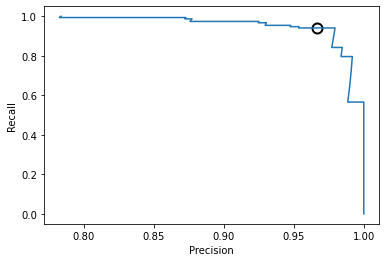

In [33]:
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")

## The RandomForest Model look better than the SVC Model

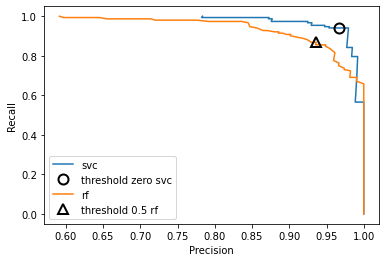

In [34]:
plt.plot(precision, recall, label="svc")
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
label="threshold zero svc", fillstyle="none", c='k', mew=2)
plt.plot(precision_rf, recall_rf, label="rf")
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

## 4.5 XGBoost Model

In [35]:
# fit model no training data
model = XGBClassifier(colsample_bytree = 0.2, learning_rate = 0.01, max_depth = 7, alpha = 10, n_estimators = 10000)
model.fit(data_imputed_X, data_imputed_y)




XGBClassifier(alpha=10, colsample_bytree=0.2, learning_rate=0.01, max_depth=7,
              n_estimators=10000)

In [36]:
# make predictions for test data
y_pred = model.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 89.00%


## Computing the average precision
- We can see that RF_Model perfome better

In [37]:
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("Average precision of random forest: {:.3f}".format(ap_rf))
print("Average precision of svc: {:.3f}".format(ap_svc))

Average precision of random forest: 0.972
Average precision of svc: 0.989


## 5 Submission

In [38]:
svc_model=pd.DataFrame({'Survived': svc.predict(X_test).astype(int)})


In [39]:
tree_model=pd.DataFrame({'Survived': tree.predict(X_test).astype(int)})
rf_model=pd.DataFrame({'Survived': rf.predict(X_test).astype(int)})
XGboot_model=pd.DataFrame({'Survived': model.predict(X_test).astype(int)})
Sub= pd.concat([output['PassengerId'].reset_index(drop=True), XGboot_model], axis=1)
Sub.to_csv('./Submission.csv',index=False)